In [15]:
%matplotlib inline
from datetime import datetime
from IPython.display import Markdown
from os.path import join
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', header=None, 
                         names=['userId', 'movieId', 'rating', 'timestamp'])
ratings_df['timestamp'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] = ratings_df['timestamp'].dt.month
ratings_df = ratings_df.sort_values('timestamp')

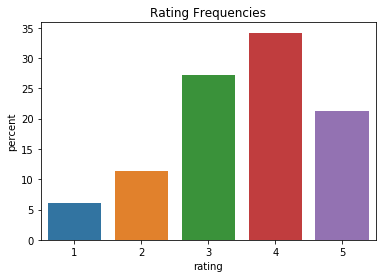

In [18]:
norm_counts = (
    ratings_df['rating']
    .value_counts(normalize=True, sort=False)
    .multiply(100)
    .reset_index()
    .rename(columns={'rating': 'percent', 'index': 'rating'})
)
ax = sns.barplot(x='rating', y='percent', data=norm_counts)
ax.set_title('Rating Frequencies')
plt.show()

,year,month,# of Ratings
Date,,,
1997-09-01,1997,9,6808
1997-10-01,1997,10,10368
1997-11-01,1997,11,24073
1997-12-01,1997,12,11695
1998-01-01,1998,1,14100
1998-02-01,1998,2,10961
1998-03-01,1998,3,12987
1998-04-01,1998,4,9008


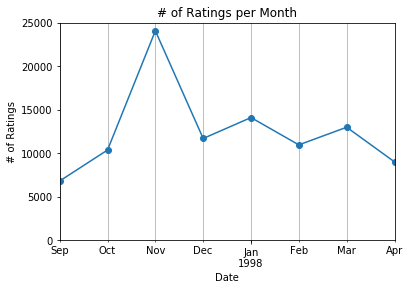

In [19]:
month_counts = ratings_df[['year', 'month', 'rating']].groupby(['year', 'month']).count()
month_counts = month_counts.rename(index=str, columns={'rating': '# of Ratings'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)
month_counts['# of Ratings'].plot(style='o-')
plt.ylabel('# of Ratings')
plt.title('# of Ratings per Month')
plt.ylim([0, 25000])
plt.gca().grid(which='minor')
plt.show()

,year,month,Rating,std
Date,,,,
1997-09-01,1997,9,3.541569,1.091807
1997-10-01,1997,10,3.594425,1.097959
1997-11-01,1997,11,3.558759,1.110674
1997-12-01,1997,12,3.578367,1.110067
1998-01-01,1998,1,3.397092,1.187497
1998-02-01,1998,2,3.456619,1.128093
1998-03-01,1998,3,3.548395,1.109802
1998-04-01,1998,4,3.576710,1.142116


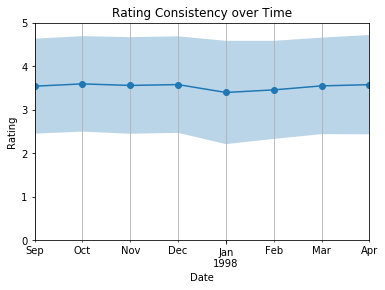

In [21]:
month_counts = ratings_df.groupby(['year', 'month'])['rating'].agg([np.mean, np.std])
month_counts = month_counts.rename(index=str, columns={'mean': 'Rating'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)
month_counts['Rating'].plot(style='o-')
plt.fill_between(month_counts.index,
                 month_counts['Rating'] - month_counts['std'],
                 month_counts['Rating'] + month_counts['std'],
                 alpha=0.3,
                )
plt.ylim([0, 5])
plt.ylabel('Rating')
plt.gca().grid(which='minor')
plt.title('Rating Consistency over Time')
plt.show()